# Train Test Splits, Cross Validation, and Linear Regression

![Lregressions.png](Assets/LinearRegr.png)

# Learning Objectives

- Explain the difference between over-fitting and under-fitting a model
- Describe Bias-variance tradeoffs
- Find the optimal training and test data set splits, cross-validation, and model complexity versus error
- Apply a linear regression model for supervised learning
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code prior to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars.


### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Month Sold</li>
          <li>YrSold: Year Sold</li><br>
          
          <li>SaleType: Type of sale</li>
          <li>SaleCondition: Condition of sale</li><br>

          <li>MSSubClass: The building class</li>
          <li>MSZoning: The general zoning classification</li><br>

          <li>Neighborhood: Physical locations within Ames city limits</li>
          <li>Street: Type of road access</li>
          <li>Alley: Type of alley access</li><br>

          <li>LotArea: Lot size in square feet</li>
          <li>LotConfig: Lot configuration</li>
          <li>LotFrontage: Linear feet of street connected to property</li>
          <li>LotShape: General shape of property</li><br>

          <li>LandSlope: Slope of property</li>
          <li>LandContour: Flatness of the property</li><br>

          <li>YearBuilt: Original construction date</li>
          <li>YearRemodAdd: Remodel date</li>
          <li>OverallQual: Overall material and finish quality</li>
          <li>OverallCond: Overall condition rating</li><br>

          <li>Utilities: Type of utilities available</li>
          <li>Foundation: Type of foundation</li>
          <li>Functional: Home functionality rating</li><br>

          <li>BldgType: Type of dwelling</li>
          <li>HouseStyle: Style of dwelling</li><br>
          
          <li>1stFlrSF: First Floor square feet</li>
          <li>2ndFlrSF: Second floor square feet</li>
          <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
          <li>GrLivArea: Above grade (ground) living area square feet</li>
          <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li><br>

          <li>Condition1: Proximity to main road or railroad</li>
          <li>Condition2: Proximity to main road or railroad (if a second is present)</li><br>
          
          <li>RoofStyle: Type of roof</li>
          <li>RoofMatl: Roof material</li><br>

          <li>ExterQual: Exterior material quality</li>
          <li>ExterCond: Present condition of the material on the exterior</li>
          <li>Exterior1st: Exterior covering on house</li>
          <li>Exterior2nd: Exterior covering on house (if more than one material)</li><br><br>
          
        </ul>
      </td>
      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>
          
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>

          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>

          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>

          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>
          
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>
          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>
          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>
          
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>
          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>
          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>


In [1]:
from __future__ import print_function
import os
data_path = ['../data']

#from sklearnex import patch_sklearn
#patch_sklearn()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`).
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type.

In [3]:
import pandas as pd
import numpy as np

# Import the data using the file path

#filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
#data1 = pd.read_csv(filepath, sep=',')

data1 = pd.read_csv("/content/drive/MyDrive/Datasets/Ames_Housing_Sales.csv")

print(data1.shape)

data = data1.dropna()
print(data.shape)


(1379, 80)
(1379, 80)


In [4]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [5]:
#Display value counts of data set

print(data.value_counts())

1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2  BsmtFullBath  BsmtHalfBath  BsmtQual  BsmtUnfSF  CentralAir  Condition1  Condition2  Electrical  EnclosedPorch  ExterCond  ExterQual  Exterior1st  Exterior2nd  Fence  FireplaceQu  Fireplaces  Foundation  FullBath  Functional  GarageArea  GarageCars  GarageCond  GarageFinish  GarageQual  GarageType  GarageYrBlt  GrLivArea  HalfBath  Heating  HeatingQC  HouseStyle  KitchenAbvGr  KitchenQual  LandContour  LandSlope  LotArea  LotConfig  LotFrontage  LotShape  LowQualFinSF  MSSubClass  MSZoning  MasVnrArea  MasVnrType  MiscFeature  MiscVal  MoSold  Neighborhood  OpenPorchSF  OverallCond  OverallQual  PavedDrive  PoolArea  PoolQC  RoofMatl  RoofStyle  SaleCondition  SaleType  ScreenPorch  Street  TotRmsAbvGrd  TotalBsmtSF  Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold  SalePrice
438.0     0.0       0.0        None   1             1Fam      Fa     

## Question 2

As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [9]:
# Select the object (string) columns

data[data.columns[data.dtypes == 'object']]

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,None,1Fam,None,None,None,None,None,Y,Norm,Norm,...,None,Gilbert,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1375,None,1Fam,TA,No,ALQ,Rec,Gd,Y,Norm,Norm,...,None,NWAmes,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1376,None,1Fam,Gd,No,GLQ,Unf,TA,Y,Norm,Norm,...,Shed,Crawfor,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1377,None,1Fam,TA,Mn,GLQ,Rec,TA,Y,Norm,Norm,...,None,NAmes,Y,None,CompShg,Hip,Normal,WD,Pave,AllPub


In [25]:
# Determine how many extra columns would be created

# No need to encode if there is only one value

# Number of one-hot columns is one less than the number of categories

# This is 215 columns, assuming the original ones are dropped.
# This is quite a few extra columns!

cat_columns = data.columns[data.dtypes == 'object']
num = 0
for col in cat_columns:
  if data[col].nunique() != 1:
    num = num + data[col].nunique() - 1
print("Number of extra columns: ",num)


Number of extra columns:  215


## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [29]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()
# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

ohc_columns = (data[cat_columns].apply(lambda x: x.nunique()).sort_values(ascending=False))

for col in ohc_columns.index:
    # Integer encode the string categories
    int_enc = le.fit_transform(data_ohc[col]).astype(int)

    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col,axis=1)

    # One hot encode the data--this returns a sparse array
    new_data = ohc.fit_transform(int_enc.reshape(-1,1))

    # Create unique column names
    n_cols = new_data.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_data.toarray(),index=data_ohc.index,columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)


In [32]:
# Column difference is as calculated above
print("No. of columns in ohc data:",data_ohc.shape[1])
print("No. of columns in original dataset:",data.shape[1])
print("Difference:",data_ohc.shape[1] - data.shape[1])

No. of columns in ohc data: 295
No. of columns in original dataset: 80
Difference: 215


In [33]:
# Remove the string columns from the dataframe
no_str_data = data.drop(ohc_columns.index, axis = 1)

#print shape of
no_str_data.shape[1]

37

## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data.
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [63]:
y_col = 'SalePrice'
x_col = [i for i in no_str_data.columns if i != y_col]
x_data = no_str_data[x_col]
y_data = no_str_data[y_col]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.3, random_state=93)

x_col_ohc = [x for x in data_ohc.columns if x != y_col]
x_data_ohc = data_ohc[x_col_ohc]
y_data_ohc = data_ohc[y_col]

x_train_ohc, x_test_ohc, y_train_ohc, y_test_ohc = train_test_split(x_data_ohc, y_data_ohc,test_size=0.3, random_state=93)


In [64]:
(x_train.index == x_train_ohc.index).all()

True

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
errors_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(x_train, y_train)
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

errors_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),'test' : mean_squared_error(y_test,  y_test_pred)},name='no ohc'))

# Data that have been one-hot encoded
LR = LR.fit(x_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(x_train_ohc)
y_test_ohc_pred = LR.predict(x_test_ohc)

errors_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},name='ohc'))

# Assemble the results
errors_df = pd.concat(errors_df, axis=1)
errors_df

,no ohc,ohc
train,9.821109e+08,3.980483e+08
test,2.176958e+09,3.053430e+18


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [90]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [67]:
scaler = StandardScaler()

training_test_sets = {'not_encoded': (x_train, y_train, x_test, y_test),'one_hot_encoded': (x_train_ohc, y_train_ohc, x_test_ohc, y_test_ohc)}

mask = x_train.dtypes == float
float_columns = x_train.columns[mask]

LR = LinearRegression()

errors = {}
for encoding_label, (_x_train, _y_train, _x_test, _y_test) in training_test_sets.items():
    trainingset = _x_train.copy()
    testset = _x_test.copy()
    trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
    testset[float_columns] = scaler.transform(testset[float_columns])
    LR.fit(trainingset, _y_train)
    predictions = LR.predict(testset)
    key = encoding_label + ' - standard scaling'
    errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)


not_encoded - standard scaling        2.176958e+09
one_hot_encoded - standard scaling    1.916152e+09
--------------------------------------------------------------------------------
not_encoded - standard scaling 2176957718.972111
one_hot_encoded - standard scaling 1916152191.8107862


## Question 6

Plot predictions vs actual for one of the models.

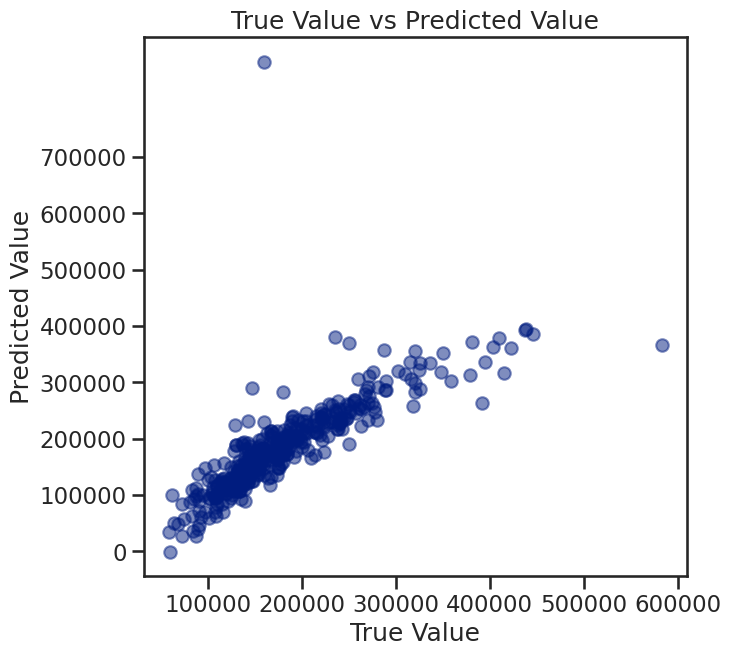

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

plt.figure(figsize=(7,7))

ax = plt.axes()

ax.scatter(y_test, y_test_pred, alpha=0.5)

ax.set(xlabel='True Value', ylabel='Predicted Value', title='True Value vs Predicted Value');

xticks = ax.get_xticks()
ax.set_yticks(xticks);
